In [1]:
import matplotlib.pyplot as plt
import pickle
legend_properties = {'weight':'bold'}

In [2]:
data_folder = r"E:\data\dao-0310\V4_3\TurbulenceRate"
dao_performance_file = data_folder + r"\dao_performance_across_turbulence"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turbulence"
autonomy_performance_file = data_folder + r"\autonomy_performance_across_turbulence"

consensus_performance_file = data_folder + r"\consensus_performance_across_turbulence"
superior_performance_file = data_folder + r"\superior_performance_across_turbulence"

dao_diversity_file = data_folder + r"\dao_diversity_across_turbulence"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turbulence"
autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turbulence"

dao_variance_file = data_folder + r"\dao_variance_across_turbulence"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turbulence"
autonomy_variance_file = data_folder + r"\autonomy_variance_across_turbulence"


dao_original_performance_file = data_folder + r"\dao_performance_across_turbulence_time"
hierarchy_original_performance_file = data_folder + r"\hierarchy_performance_across_turbulence_time"
autonomy_original_performance_file = data_folder + r"\autonomy_performance_across_turbulence_time"

dao_original_diversity_file = data_folder + r"\dao_diversity_across_turbulence_time"
hierarchy_original_diversity_file = data_folder + r"\hierarchy_diversity_across_turbulence_time"
autonomy_original_diversity_file = data_folder + r"\autonomy_diversity_across_turbulence_time"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(autonomy_diversity_file, 'rb') as infile:
    autonomy_diversity = pickle.load(infile)

with open(consensus_performance_file, 'rb') as infile:
    consensus_performance = pickle.load(infile)
with open(superior_performance_file, 'rb') as infile:
    superior_performance = pickle.load(infile)

with open(dao_original_performance_file, 'rb') as infile:
    dao_original_performance = pickle.load(infile)
with open(hierarchy_original_performance_file, 'rb') as infile:
    hierarchy_original_performance = pickle.load(infile)
with open(autonomy_original_performance_file, 'rb') as infile:
    autonomy_original_performance = pickle.load(infile)

with open(dao_original_diversity_file, 'rb') as infile:
    dao_original_diversity = pickle.load(infile)
with open(hierarchy_original_diversity_file, 'rb') as infile:
    hierarchy_original_diversity = pickle.load(infile)
with open(autonomy_original_diversity_file, 'rb') as infile:
    autonomy_original_diversity = pickle.load(infile)

In [3]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

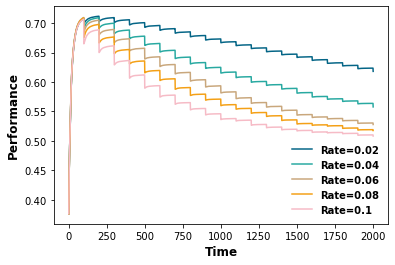

<Figure size 432x288 with 0 Axes>

In [4]:
# DAO Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(dao_original_performance[0]))
plt.plot(x, dao_original_performance[0], "k-", color=morandi_blue, label="Rate=0.02")
plt.plot(x, dao_original_performance[1], "k-", color=morandi_green, label="Rate=0.04")
plt.plot(x, dao_original_performance[2], "k-", color=morandi_yellow, label="Rate=0.06")
plt.plot(x, dao_original_performance[3], "k-", color=morandi_orange, label="Rate=0.08")
plt.plot(x, dao_original_performance[4], "k-", color=morandi_pink, label="Rate=0.1")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\DAO_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

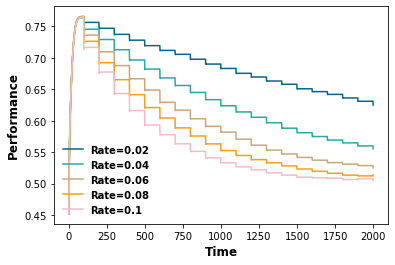

<Figure size 432x288 with 0 Axes>

In [5]:
# Hierarchy Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(hierarchy_original_performance[0]))
plt.plot(x, hierarchy_original_performance[0], "k-", color=morandi_blue, label="Rate=0.02")
plt.plot(x, hierarchy_original_performance[1], "k-", color=morandi_green, label="Rate=0.04")
plt.plot(x, hierarchy_original_performance[2], "k-", color=morandi_yellow, label="Rate=0.06")
plt.plot(x, hierarchy_original_performance[3], "k-", color=morandi_orange, label="Rate=0.08")
plt.plot(x, hierarchy_original_performance[4], "k-", color=morandi_pink, label="Rate=0.1")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\Hierarchy_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

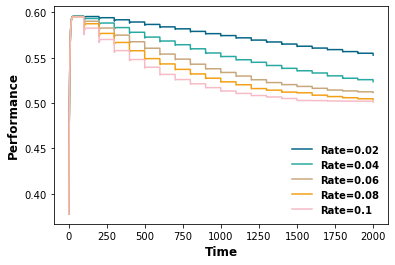

<Figure size 432x288 with 0 Axes>

In [6]:
# Autonomy Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(autonomy_original_performance[0]))
plt.plot(x, autonomy_original_performance[0], "k-", color=morandi_blue, label="Rate=0.02")
plt.plot(x, autonomy_original_performance[1], "k-", color=morandi_green, label="Rate=0.04")
plt.plot(x, autonomy_original_performance[2], "k-", color=morandi_yellow, label="Rate=0.06")
plt.plot(x, autonomy_original_performance[3], "k-", color=morandi_orange, label="Rate=0.08")
plt.plot(x, autonomy_original_performance[4], "k-", color=morandi_pink, label="Rate=0.1")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\Autonomy_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

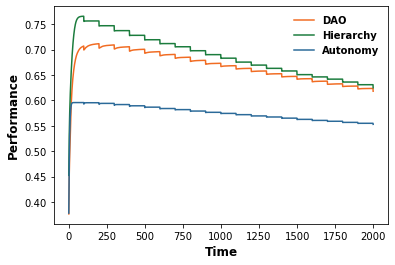

<Figure size 432x288 with 0 Axes>

In [7]:
# 0.02 Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(dao_original_performance[0]))
plt.plot(x, dao_original_performance[0], "k-", color=nature_orange, label="DAO")
plt.plot(x, hierarchy_original_performance[0], "k-", color=nature_green, label="Hierarchy")
plt.plot(x, autonomy_original_performance[0], "k-", color=nature_blue, label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\R0.02_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

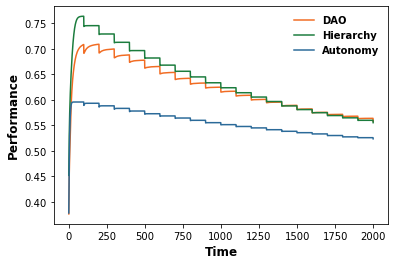

<Figure size 432x288 with 0 Axes>

In [8]:
# 0.04 Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(dao_original_performance[1]))
plt.plot(x, dao_original_performance[1], "k-", color=nature_orange, label="DAO")
plt.plot(x, hierarchy_original_performance[1], "k-", color=nature_green, label="Hierarchy")
plt.plot(x, autonomy_original_performance[1], "k-", color=nature_blue, label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\R0.04_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

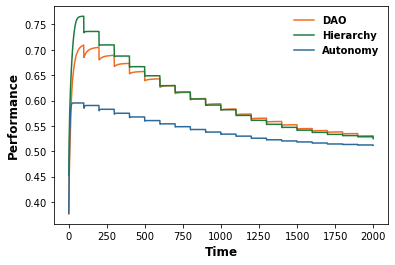

<Figure size 432x288 with 0 Axes>

In [9]:
# 0.06 Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
legend_properties = {'weight':'bold'}
x = range(len(dao_original_performance[2]))
plt.plot(x, dao_original_performance[2], "k-", color=nature_orange, label="DAO")
plt.plot(x, hierarchy_original_performance[2], "k-", color=nature_green, label="Hierarchy")
plt.plot(x, autonomy_original_performance[2], "k-", color=nature_blue, label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\R0.06_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

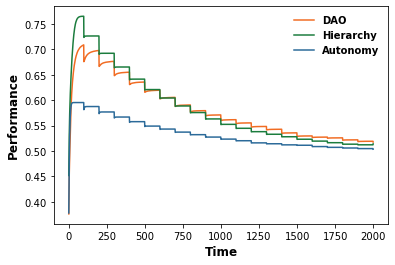

<Figure size 432x288 with 0 Axes>

In [10]:
# 0.08 Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(dao_original_performance[3]))
plt.plot(x, dao_original_performance[3], "k-", color=nature_orange, label="DAO")
plt.plot(x, hierarchy_original_performance[3], "k-", color=nature_green, label="Hierarchy")
plt.plot(x, autonomy_original_performance[3], "k-", color=nature_blue, label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\R0.08_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()

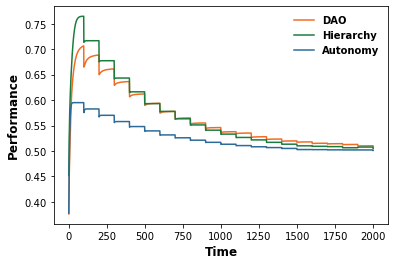

<Figure size 432x288 with 0 Axes>

In [11]:
# 0.1 Turbulence
# turbulence_rate_list = [0.02, 0.04, 0.06, 0.08, 0.1]
x = range(len(dao_original_performance[4]))
plt.plot(x, dao_original_performance[4], "k-", color=nature_orange, label="DAO")
plt.plot(x, hierarchy_original_performance[4], "k-", color=nature_green, label="Hierarchy")
plt.plot(x, autonomy_original_performance[4], "k-", color=nature_blue, label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\R0.1_Turbulence_performance.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()